# **Pandas `bar` plots**
---

+ Makes plots of `Series` or `DataFrame`
+ By default, `matplotlib` is used, hence `matplotlib` plotting keyword arguments can be passed, and `matplotlib` methods can be called to modify the plot

> From `pandas`, bar plots can be achieved through the following method calls:
+ `df.plot.bar(x=None, y=None, **kwargs))` or `df.plot(kind="bar", x=None, y=None, **kwargs))` - Vertical bar
+ `df.plot.barh(x=None, y=None, **kwargs))` or `df.plot(kind="barh", x=None, y=None, **kwargs))` - Horizontal bar

>> Arguments:
+ `**kwargs` - Options to pass to [`matplotlib.pyplot.bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)
+ `x` : label or position, optional - Allows plotting of one column versus another. If not specified, the index of the DataFrame is used.  
+ `y` : label or position, optional - Allows plotting of one column versus another. If not specified, all numerical columns are used.
+ Additional keyword arguments are documented in [`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot)

>> Returns: [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) or `np.ndarray` of them

### Import datasets

In [ ]:
# Import pandas
import pandas as pd

salaries = pd.read_csv("/content/Salaries.csv", low_memory=False)

# Convert columns to numeric
salaries["BasePay"] = pd.to_numeric(salaries["BasePay"], errors="coerce").fillna(0)
salaries["OvertimePay"] = pd.to_numeric(salaries["OvertimePay"], errors="coerce").fillna(0)
salaries["OtherPay"] = pd.to_numeric(salaries["OtherPay"], errors="coerce").fillna(0)

# Little peek into the data
salaries.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


In [ ]:
# Make a sub-set of the dataframe
df = salaries[["EmployeeName", "BasePay", "OvertimePay", "OtherPay"]]
df.set_index("EmployeeName", inplace=True)

# A little peek into the data
df.head()

,BasePay,OvertimePay,OtherPay
EmployeeName,,,
NATHANIEL FORD,167411.18,0.00,400184.25
GARY JIMENEZ,155966.02,245131.88,137811.38
ALBERT PARDINI,212739.13,106088.18,16452.60
CHRISTOPHER CHONG,77916.00,56120.71,198306.90
PATRICK GARDNER,134401.60,9737.00,182234.59


### Import `matplotlib`

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Specify the style sheet to use
plt.style.use("ggplot")

### Make a grouped vertical bar plot of the first 5 values
+ If no `x` and `y` arguments are provided (like in the example provided below), the `index`**_s_** of the `DataFrame` are used for the `x` axis, all the `columns` are plotted against each other on the `y` axis

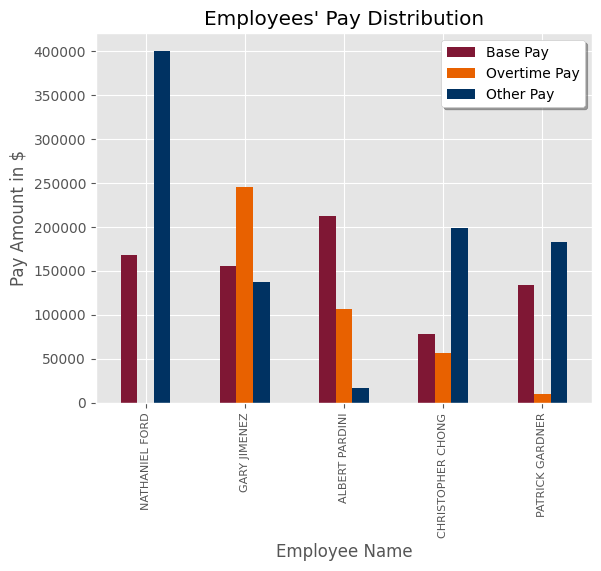

In [ ]:
# Make the grouped plot first
df.head().plot.bar(color=["#7f1734", "#e86100", "#003262"])

# Customize using matplotlib methods
plt.ylabel("Pay Amount in $")
plt.xlabel("Employee Name")
plt.xticks(fontsize=8)
plt.title("Employees' Pay Distribution")
plt.legend(labels=["Base Pay", "Overtime Pay", "Other Pay"], facecolor="#ffffff", fancybox=True, shadow=True)

plt.show()

### Make a stacked vertical bar plot of the first 5 values
+ The `DataFrame.plot.box(stacked=True)` argument specifies that the columns are stacked on top of each other on the bar

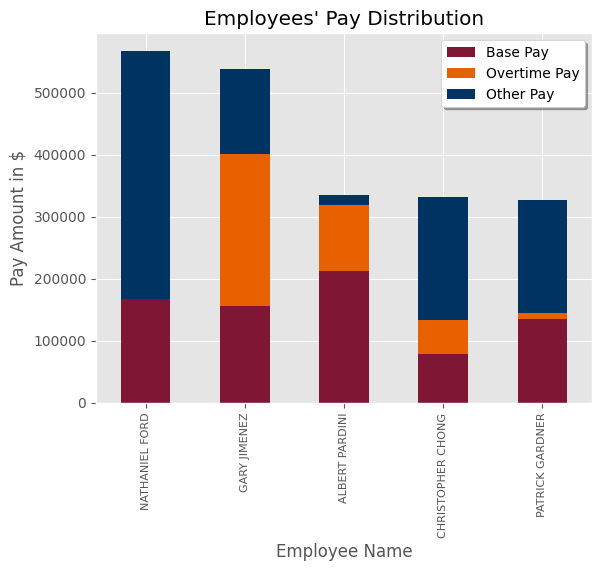

In [ ]:
# Make the grouped plot first
df.head().plot(kind='bar', stacked=True, color=["#7f1734", "#e86100", "#003262"])

# Customize using matplotlib methods
plt.ylabel("Pay Amount in $")
plt.xlabel("Employee Name")
plt.xticks(fontsize=8)
plt.title("Employees' Pay Distribution")
plt.legend(facecolor="#ffffff", fancybox=True, shadow=True, labels=["Base Pay", "Overtime Pay", "Other Pay"])

plt.show()

### Grouped horizontal bar plot
+ Horizontal bar plots are achieved by calling `DataFrame.plot.barh()` method


In [ ]:
# sort the df dataframe by Overtimepay
df.sort_values(by="OvertimePay", ascending=False).head()

,BasePay,OvertimePay,OtherPay
EmployeeName,,,
GARY JIMENEZ,155966.02,245131.88,137811.38
Gary Altenberg,128808.87,220909.48,13126.31
Whitney P Yee,95123.00,196689.18,16622.66
Frederick Binkley,126863.19,192424.49,17917.18
Antonio B Santiago,94191.04,173547.73,19740.81


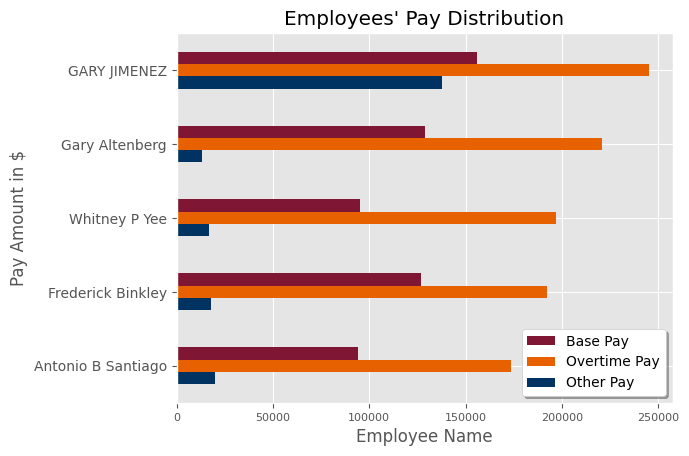

In [ ]:
# Saving the Axes a variable does not prevent it from being rendered
ax = df.sort_values(by="OvertimePay", ascending=False).head().plot.barh(color=["#7f1734", "#e86100", "#003262"])

# Invert the yaxis
ax.invert_yaxis()
# Customize using matplotlib methods
plt.ylabel("Pay Amount in $")
plt.xlabel("Employee Name")
plt.xticks(fontsize=8)
plt.title("Employees' Pay Distribution")
plt.legend(labels=["Base Pay", "Overtime Pay", "Other Pay"], facecolor="#ffffff", fancybox=True, shadow=True)

plt.show()

# **Exercise Time!** 💪 💪 💪
---
Work with `pandas` and the `billboard_charts.csv` dataset to generate the `top_artists.png` bar plot in the `pics` folder. It visualizes the top 10 artists who have spent the most weeks at number 1 in the dataset

+ Import that dataset and parse the `date` column as a date
+ The figure is 8 x 6
+ The bars have a black edge with a width of 1.5.

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Specify style sheet
plt.style.use("ggplot")

In [ ]:
# Import pandas
import pandas as pd

# Import the dataset while parsing the date column into a datetime type
charts = pd.read_csv("/content/billboard_charts.csv", parse_dates=["date"])

In [ ]:
# A little peek into the data
charts.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [ ]:
# Filter dataset by rank==1, and find artists' weekly frequency appearance
top_artists = charts[charts["rank"]==1]["artist"].value_counts(ascending=False).head(10)
top_artists

artist
Mariah Carey           65
The Beatles            54
Boyz II Men            34
Madonna                32
Whitney Houston        31
Drake                  31
Michael Jackson        30
The Black Eyed Peas    28
Bee Gees               27
Adele                  26
Name: count, dtype: int64

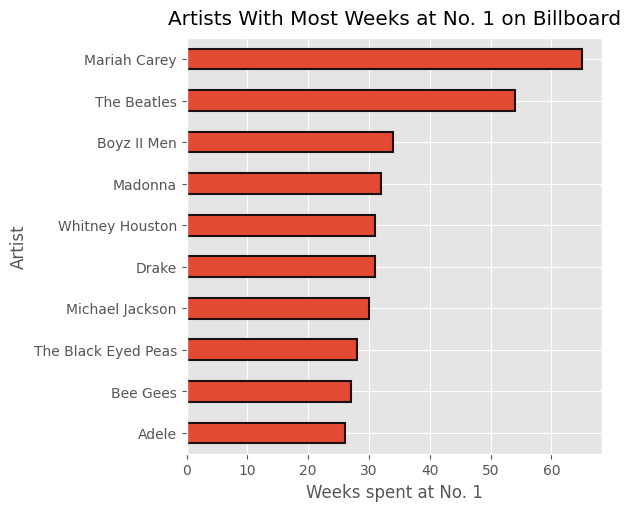

In [ ]:
# Plot the Series returned from above
plt.figure(figsize=(6,5), layout="constrained")
top_artists.plot.barh(edgecolor="#1a1110", linewidth=1.5)

# Customize using matplotlib
plt.ylabel("Artist")
plt.xlabel("Weeks spent at No. 1")
plt.title("Artists With Most Weeks at No. 1 on Billboard", pad=10)
# Get current Axes and invert the yaxis
plt.gca().invert_yaxis()

plt.show()